# General scrip to invert the problem of Neutrino Physics

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

# Benchmark point

In [3]:
#!/usr/bin/env python

import pyslha
import pySDdiracDM_LesHouches_generator
#import numpy as np
#import pandas as pd
#import subprocess
#import time
import sys

# Tiempo inicial
t1=time.time() 

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pySDdiracDM_LesHouches_generator.buildSLHAinFile()

x=[]

#times to run the program. Entry using the keyboard
#Num = int(sys.argv[1])
Num = 1

for n in range(0,Num):

    #Random parameters as input  
    #BLOCK MINPAR
    MDF = 300.
    MS12 = np.exp(np.random.uniform(np.log(1.*10**(4)),np.log(9.*10**(6))))
    MS22 = 9.0E+06
    LamS1H = 0.0E-04
    LamS2H = 0.0E-04
    LamSPH = 0.0E-04
    LamS = 1.0E-04
    LamSP = 3.0E-01    
    vS = 500.
    YRD = 1.0E-03
    YRC = 5.0E-02
    
    # Modific the LesHouches   
    xdict.blocks['MINPAR'].entries[2]='%.7E    # MDFInput' %MDF
    xdict.blocks['MINPAR'].entries[3]='%.7E    # MS12Input' %MS12
    xdict.blocks['MINPAR'].entries[4]='%.7E    # MS22Input' %MS22
    xdict.blocks['MINPAR'].entries[5]='%.7E    # LamS1HInput' %LamS1H
    xdict.blocks['MINPAR'].entries[6]='%.7E    # LamS2HInput' %LamS2H
    xdict.blocks['MINPAR'].entries[7]='%.7E    # LamSPHInput' %LamSPH
    xdict.blocks['MINPAR'].entries[8]='%.7E    # LamSInput' %LamS
    xdict.blocks['MINPAR'].entries[9]='%.7E    # LamSPInput' %LamSP
    xdict.blocks['MINPAR'].entries[10]='%.7E    # vSInput' %vS
    xdict.blocks['MINPAR'].entries[11]='%.7E    # YRDInput' %YRD
    xdict.blocks['MINPAR'].entries[12]='%.7E    # YRCInput' %YRC
    
    YRA11 = 1.500000E-02
    YRA12 = 2.000000E-02    
    YRA13 = 1.000000E-02
    
    xdict.blocks['YRA1IN'].entries[1]='%.6E    # YRA1(1)' %YRA11  
    xdict.blocks['YRA1IN'].entries[2]='%.6E    # YRA1(2)' %YRA12     
    xdict.blocks['YRA1IN'].entries[3]='%.6E    # YRA1(3)' %YRA13 
    
    YRA21 = 3.500000E-03
    YRA22 = 2.000000E-03    
    YRA23 = 1.000000E-03
    
    xdict.blocks['YRA2IN'].entries[1]='%.6E    # YRA2(1)' %YRA21  
    xdict.blocks['YRA2IN'].entries[2]='%.6E    # YRA2(2)' %YRA22     
    xdict.blocks['YRA2IN'].entries[3]='%.6E    # YRA2(3)' %YRA23     

    YRB11 = 1.100000E-04
    YRB12 = 3.000000E-03    
    YRB13 = 1.100000E-03
    
    xdict.blocks['YRB1IN'].entries[1]='%.6E    # YRB1(1)' %YRB11  
    xdict.blocks['YRB1IN'].entries[2]='%.6E    # YRB1(2)' %YRB12     
    xdict.blocks['YRB1IN'].entries[3]='%.6E    # YRB1(3)' %YRB13 
    
    YRB21 = 1.500000E-04
    YRB22 = 3.000000E-03    
    YRB23 = 1.100000E-03
    
    xdict.blocks['YRB2IN'].entries[1]='%.6E    # YRB2(1)' %YRB21  
    xdict.blocks['YRB2IN'].entries[2]='%.6E    # YRB2(2)' %YRB22     
    xdict.blocks['YRB2IN'].entries[3]='%.6E    # YRB2(3)' %YRB23      
    
    #Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.SDdiracDM_low',xdict)
    
    #run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDdiracDM LesHouches.in.SDdiracDM_low')
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDdiracDM')
    
    mh1 = eval(SPheno_output.split('Block MASS')[1].split()[9])
    mh2 = eval(SPheno_output.split('Block MASS')[1].split()[13])  
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fe_3')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fe_3')[1].split()[1])            
    mv2 = eval(SPheno_output.split('# Fe_3')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fe_3')[1].split()[9])    
    
    mS1 = eval(SPheno_output.split('# Fe_3')[1].split()[13])
    mS2 = eval(SPheno_output.split('# Fe_3')[1].split()[17])

    mCha = eval(SPheno_output.split('# Fe_3')[1].split()[21])
    mChi1 = eval(SPheno_output.split('# Fe_3')[1].split()[25])
    mChi2 = eval(SPheno_output.split('# Fe_3')[1].split()[29])
    
    XV11 = eval(SPheno_output.split('Block XV')[1].split()[6])
    XV12 = eval(SPheno_output.split('Block XV')[1].split()[11])
    XV21 = eval(SPheno_output.split('Block XV')[1].split()[16])
    XV22 = eval(SPheno_output.split('Block XV')[1].split()[21])
    
    XU11 = eval(SPheno_output.split('Block XU')[1].split()[6])
    XU12 = eval(SPheno_output.split('Block XU')[1].split()[11])
    XU21 = eval(SPheno_output.split('Block XU')[1].split()[16])
    XU22 = eval(SPheno_output.split('Block XU')[1].split()[21])
    
    vevSM = eval(SPheno_output.split('Block HMIX')[1].split()[6])

    x.append([MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,YRC,YRA11,YRA12,YRA13,YRA21,YRA22,YRA23,\
              YRB11,YRB12,YRB13,YRB21,YRB22,YRB23,mh1,mh2,mv3,mv2,mv1,mS1,mS2,mCha,mChi1,mChi2,\
              XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22,vevSM])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD'\
                           ,'YRC','YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13','YRB21'\
                           ,'YRB22','YRB23','mh1','mh2','mv3','mv2','mv1','mS1','mS2','mCha','mChi1','mChi2'\
                          ,'XV11','XV12','XV21','XV22','XU11','XU12','XU21','XU22','vevSM'])

t4=time.time() 
print ("The program spent", t4-t1, "s running",Num,"times")    

The program spent 0.950385570526123 s running 1 times


https://arxiv.org/abs/1708.01186

# PMNS matrix 2018 to $3\sigma$

In [4]:
#phases of the PMNS matrix and the R 
phases1 = np.random.uniform(0.,0.0*np.pi,3) # WARNING! They are in zero
delta = phases1[0]
eta1 = phases1[1]
eta2 = phases1[2]

#light neutrino masses (up 3 sigma range) NH (NO)
#mnu1 = 10**((np.log10(2.5e-3)-np.log10(1e-9))*np.random.uniform(0,1)+np.log10(1e-9))*1e-9 
#Zero in this framework
mnu1 = 0
mnu2 = np.sqrt(np.random.uniform(7.05e-5,8.14e-5)*1e-18+mnu1**2)
mnu3 = np.sqrt(np.random.uniform(2.41e-3,2.60e-3)*1e-18+mnu1**2)

#mixing angles (up 3 sigma range) NH
t12 = np.arcsin(np.sqrt(np.random.uniform(0.273,0.379)))
t23 = np.arcsin(np.sqrt(np.random.uniform(0.445,0.599)))
t13 = np.arcsin(np.sqrt(np.random.uniform(0.0196,0.0241)))

#Building PMNS matrix NH
UM12 = np.array([ [np.cos(t12),np.sin(t12),0.], [-np.sin(t12),np.cos(t12),0.], [0.,0.,1.0] ])
UM13 = np.array([ [np.cos(t13),0.,np.sin(t13)], [0.,1.0,0.], [-np.sin(t13),0.,np.cos(t13)] ])
UM23 = np.array([ [1.0,0.,0.], [0.,np.cos(t23),np.sin(t23)], [0.,-np.sin(t23),np.cos(t23)] ])
Uphases = np.array([ [np.exp(eta1*1j),0.,0.], [0.,np.exp(eta2*1j),0.], [0.,0.,1.0] ])
U=np.dot(UM23,np.dot(UM13,np.dot(UM12,Uphases)))

#Defining the U elementes. readeable
U11 = np.real(U[0,0])
U12 = np.real(U[0,1])
U13 = np.real(U[0,2])
U21 = np.real(U[1,0])
U22 = np.real(U[1,1])
U23 = np.real(U[1,2])
U31 = np.real(U[2,0])
U32 = np.real(U[2,1])
U33 = np.real(U[2,2])

In [5]:
print(U22)
print(mnu1,mnu2,mnu3)
print("SUM=",mnu1+mnu2+mnu3)

0.4818134200881593
0 8.82748169126569e-12 4.9934913000160914e-11
SUM= 5.876239469142661e-11


$\Lambda_i$ values

In [13]:
import neutrino_analytic2

#Sum over n (fermion sector)
mS1 = np.sqrt(LamS1H*vevSM**2/2.+MS12)
mS2 = np.sqrt(LamS2H*vevSM**2/2.+MS22)

mChi1 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['m1']
mChi2 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['m2']
V12 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V12']
V22 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V22']
U11 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U11']
U21 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U21']

L1 = neutrino_analytic2.LAMBDA(mChi1,mS1,V12,U11)+ neutrino_analytic2.LAMBDA(mChi2,mS1,V22,U21)
L2 = neutrino_analytic2.LAMBDA(mChi1,mS2,V12,U11)+ neutrino_analytic2.LAMBDA(mChi2,mS2,V22,U21)

print(L1,L2)

-6.428912534536979e-05 -2.992897802602536e-06


In [12]:
neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)

{'U11': 0.9999998322720537,
 'U12': -0.0005791855182020302,
 'U21': 0.0005791855182020302,
 'U22': 0.9999998322720537,
 'V11': 0.9999999994176116,
 'V12': -3.412882825265867e-05,
 'V21': 3.412882825265867e-05,
 'V22': 0.9999999994176116,
 'm1': 300.00005014367576,
 'm2': 17.677666574919748}

# Yukawa values

In [14]:
vevSM

244.874425

In [15]:
#Free
a11 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
a12 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
b11 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
b12 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))

#Analitic computed by hand
a21 = U12*mnu2/(L1*b11)
a22 = U12*mnu2/(L2*b12)

a31 = U13*mnu3/(L1*b11)
a32 = U13*mnu3/(L2*b12)

b21 = -b11/(1.+U32/U22)
b22 = -b12/(1.+U32/U22)

b31 = -b11/(1.+U22/U32)
b32 = -b12/(1.+U22/U32)

In [16]:
print(a11,a12,a21,a22,a31,a32)
print(b11,b12,b21,b22,a31,b32)

0.015583344416715625 0.0737653548185159 -1.646718209332013e-05 -1.7369380829764126e-05 -2.3230631525047276e-05 -2.4503383978376583e-05
0.004981458045030514 0.10144649750328325 0.015072345456320644 0.30694560545955346 -2.3230631525047276e-05 -0.4083921029628366


# Check all! In process...

In [18]:
#!/usr/bin/env python

import pyslha
import pySDdiracDM_LesHouches_generator
#import numpy as np
#import pandas as pd
#import subprocess
#import time
import sys
import neutrino_analytic2

# Tiempo inicial
t1=time.time() 

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pySDdiracDM_LesHouches_generator.buildSLHAinFile()

x=[]

#times to run the program. Entry using the keyboard
#Num = int(sys.argv[1])
Num = 1

for n in range(0,Num):

    #Random parameters as input  
    #BLOCK MINPAR
    MDF = 300.
    MS12 = np.exp(np.random.uniform(np.log(1.*10**(4)),np.log(9.*10**(6))))
    MS22 = 9.0E+06
    LamS1H = 0.0E-04
    LamS2H = 0.0E-04
    LamSPH = 0.0E-04
    LamS = 1.0E-04
    LamSP = 3.0E-01    
    vS = 500.
    YRD = 1.0E-03
    YRC = 5.0E-02
    
    # Modific the LesHouches   
    xdict.blocks['MINPAR'].entries[2]='%.7E    # MDFInput' %MDF
    xdict.blocks['MINPAR'].entries[3]='%.7E    # MS12Input' %MS12
    xdict.blocks['MINPAR'].entries[4]='%.7E    # MS22Input' %MS22
    xdict.blocks['MINPAR'].entries[5]='%.7E    # LamS1HInput' %LamS1H
    xdict.blocks['MINPAR'].entries[6]='%.7E    # LamS2HInput' %LamS2H
    xdict.blocks['MINPAR'].entries[7]='%.7E    # LamSPHInput' %LamSPH
    xdict.blocks['MINPAR'].entries[8]='%.7E    # LamSInput' %LamS
    xdict.blocks['MINPAR'].entries[9]='%.7E    # LamSPInput' %LamSP
    xdict.blocks['MINPAR'].entries[10]='%.7E    # vSInput' %vS
    xdict.blocks['MINPAR'].entries[11]='%.7E    # YRDInput' %YRD
    xdict.blocks['MINPAR'].entries[12]='%.7E    # YRCInput' %YRC
    
    
    #rUTINE TO COMPUTE LAMBDA FACTORS
    mS1 = np.sqrt(LamS1H*vevSM**2/2.+MS12)
    mS2 = np.sqrt(LamS2H*vevSM**2/2.+MS22)

    mX1 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['m1']
    mX2 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['m2']
    v12 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V12']
    v22 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V22']
    u11 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U11']
    u21 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U21']

    L1 = neutrino_analytic2.LAMBDA(mX1,mS1,v12,u11)+ neutrino_analytic2.LAMBDA(mX2,mS1,v22,u21)
    L2 = neutrino_analytic2.LAMBDA(mX1,mS2,v12,u11)+ neutrino_analytic2.LAMBDA(mX2,mS2,v22,u21)
    
    YRA11 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
    YRA12 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
    YRA13 = 1.000000E-02    
    YRA21 = 3.500000E-03
    YRA22 = 2.000000E-03    
    YRA23 = 1.000000E-03
    
    YRB11 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
    YRB12 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))   
    YRB13 = 1.100000E-03
    YRB21 = 1.500000E-04
    YRB22 = 3.000000E-03    
    YRB23 = 1.100000E-03
    
    xdict.blocks['YRA1IN'].entries[1]='%.6E    # YRA1(1)' %YRA11  
    xdict.blocks['YRA1IN'].entries[2]='%.6E    # YRA1(2)' %YRA12     
    xdict.blocks['YRA1IN'].entries[3]='%.6E    # YRA1(3)' %YRA13 
    
    
    xdict.blocks['YRA2IN'].entries[1]='%.6E    # YRA2(1)' %YRA21  
    xdict.blocks['YRA2IN'].entries[2]='%.6E    # YRA2(2)' %YRA22     
    xdict.blocks['YRA2IN'].entries[3]='%.6E    # YRA2(3)' %YRA23     
    
    xdict.blocks['YRB1IN'].entries[1]='%.6E    # YRB1(1)' %YRB11  
    xdict.blocks['YRB1IN'].entries[2]='%.6E    # YRB1(2)' %YRB12     
    xdict.blocks['YRB1IN'].entries[3]='%.6E    # YRB1(3)' %YRB13 
    
    xdict.blocks['YRB2IN'].entries[1]='%.6E    # YRB2(1)' %YRB21  
    xdict.blocks['YRB2IN'].entries[2]='%.6E    # YRB2(2)' %YRB22     
    xdict.blocks['YRB2IN'].entries[3]='%.6E    # YRB2(3)' %YRB23      
    
    #Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.SDdiracDM_low',xdict)
    
    #run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDdiracDM LesHouches.in.SDdiracDM_low')
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDdiracDM')
    
    mh1 = eval(SPheno_output.split('Block MASS')[1].split()[9])
    mh2 = eval(SPheno_output.split('Block MASS')[1].split()[13])  
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fe_3')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fe_3')[1].split()[1])            
    mv2 = eval(SPheno_output.split('# Fe_3')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fe_3')[1].split()[9])    
    
    mS1 = eval(SPheno_output.split('# Fe_3')[1].split()[13])
    mS2 = eval(SPheno_output.split('# Fe_3')[1].split()[17])

    mCha = eval(SPheno_output.split('# Fe_3')[1].split()[21])
    mChi1 = eval(SPheno_output.split('# Fe_3')[1].split()[25])
    mChi2 = eval(SPheno_output.split('# Fe_3')[1].split()[29])
    
    XV11 = eval(SPheno_output.split('Block XV')[1].split()[6])
    XV12 = eval(SPheno_output.split('Block XV')[1].split()[11])
    XV21 = eval(SPheno_output.split('Block XV')[1].split()[16])
    XV22 = eval(SPheno_output.split('Block XV')[1].split()[21])
    
    XU11 = eval(SPheno_output.split('Block XU')[1].split()[6])
    XU12 = eval(SPheno_output.split('Block XU')[1].split()[11])
    XU21 = eval(SPheno_output.split('Block XU')[1].split()[16])
    XU22 = eval(SPheno_output.split('Block XU')[1].split()[21])
    
    vevSM = eval(SPheno_output.split('Block HMIX')[1].split()[6])

    x.append([MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,YRC,YRA11,YRA12,YRA13,YRA21,YRA22,YRA23,\
              YRB11,YRB12,YRB13,YRB21,YRB22,YRB23,mh1,mh2,mv3,mv2,mv1,mS1,mS2,mCha,mChi1,mChi2,\
              XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22,vevSM])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD'\
                           ,'YRC','YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13','YRB21'\
                           ,'YRB22','YRB23','mh1','mh2','mv3','mv2','mv1','mS1','mS2','mCha','mChi1','mChi2'\
                          ,'XV11','XV12','XV21','XV22','XU11','XU12','XU21','XU22','vevSM'])

t4=time.time() 
print ("The program spent", t4-t1, "s running",Num,"times")    

The program spent 0.9598736763000488 s running 1 times


In [ ]:
WARNING WITH U IN THE DEFINITION OF THE PMNS MATRIX

In [7]:
############# Read file created before #######################
#xd=pd.read_csv('xd_neutrinos.csv')

In [8]:
xd[['mv1','mv2','mv3','mS1','mS2','vevSM','mh1']][:3]

,mv1,mv2,mv3,mS1,mS2,vevSM,mh1
0,1.478840e-17,1.945824e-13,1.753854e-09,819.039071,3000.0,244.874425,124.861947
1,0.000000e+00,1.974611e-13,5.757759e-09,286.626775,3000.0,244.874425,124.861947
2,8.286008e-18,1.889211e-13,7.425284e-10,1551.608810,3000.0,244.874425,124.861947


# Analytical rutine for Neutrino mass matriz

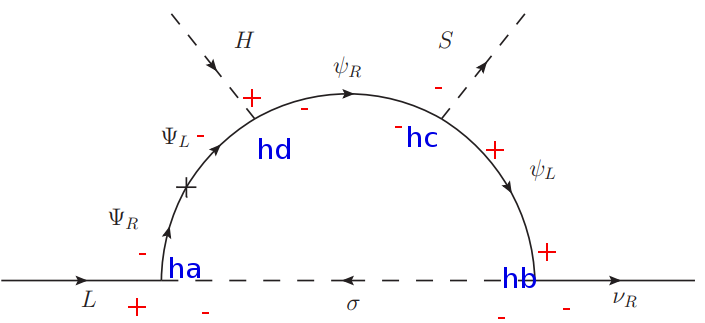

In [12]:
from IPython.display import Image
Image("/home/anferivera/Dropbox/SingletDoubletDirac/draft_SDdiracDM/figures/neutrino-GB.png", width=500)

TWO DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^2
\dfrac{V_{k2}U_{k1}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

Import the analytical rutine for compute the $\mathcal{M}_{\alpha\beta}$ version two

In [10]:
import neutrino_analytic2

Example:

In [11]:
neutrino_analytic2.MATRIXDIAG(YRB11,YRB12,YRB13,YRB21,YRB22,YRB23,YRA11,YRA12,YRA13,YRA21,YRA22,YRA23,\
                             mS1,mS2,MDF,vS,YRC,YRD,vevSM)

(2.303059424795957e-17, 1.9690648941915331e-13, 3.9976014349648335e-09)

In [12]:
#Add to the DataFrame
xd['mn1'] = neutrino_analytic2.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,xd.YRA11,xd.YRA12,\
                  xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[0]
xd['mn2'] = neutrino_analytic2.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,xd.YRA11,xd.YRA12,\
                  xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[1]
xd['mn3'] = neutrino_analytic2.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,xd.YRA11,xd.YRA12,\
                  xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[2]

In [13]:
##WARNING: The vev change in SPheno
xd[['mv1','mv2','mv3','mn1','mn2','mn3']][:3]

,mv1,mv2,mv3,mn1,mn2,mn3
0,1.478840e-17,1.945824e-13,1.753854e-09,9.508444e-18,1.945824e-13,1.753854e-09
1,0.000000e+00,1.974611e-13,5.757759e-09,2.303059e-17,1.974611e-13,5.757759e-09
2,8.286008e-18,1.889211e-13,7.425284e-10,2.296507e-18,1.889211e-13,7.425284e-10


In [14]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

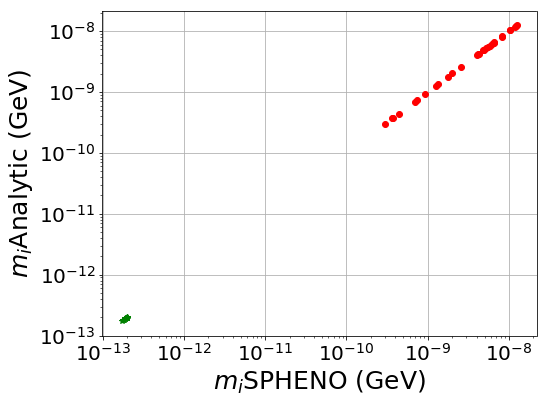

In [15]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog(xd['mv2'],xd['mn2'],c='green', marker='*')
plt.loglog(xd.mv3,xd.mn3,'ro')

plt.xlabel(r'$m_i$SPHENO (GeV)',size=25)
plt.ylabel(r'$m_i$Analytic (GeV)',size=25)

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses.pdf')

plt.show()